<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<br>
<br>
<div align="right">
<b>Corso di Laurea Magistrale in Informatica</b><br>
<b>Curriculum Data Science</b><br>
</div>
</p>

<div align="right">
Matteo Marulli<br>
Matteo Ghera<br>
</div>

# Analisi dei dati del Covid19 in Italia

<div align="right">
<b> Periodo di riferimento: 24-02-2020/12-06-2020 </b>
</div>

In questo notebook esaminiamo i dati  pubblicati dalla Protezione Civile sul Covid19 in Italia.

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from path import Path
import json
from IPython.display import YouTubeVideo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
plt.style.use('seaborn-pastel')

In [3]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

In [4]:
with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f)
json.dumps(d)
df_province =pd.DataFrame(d)

with open(DATA_DIR/'dpc-covid19-ita-regioni.json') as f:
         d= json.load(f)
json.dumps(d)
df_regioni =pd.DataFrame(d)

In [5]:
df_province.head()

data stato  codice_regione denominazione_regione  \
0  2020-02-24T18:00:00   ITA              13               Abruzzo   
1  2020-02-24T18:00:00   ITA              13               Abruzzo   
2  2020-02-24T18:00:00   ITA              13               Abruzzo   
3  2020-02-24T18:00:00   ITA              13               Abruzzo   
4  2020-02-24T18:00:00   ITA              13               Abruzzo   

   codice_provincia               denominazione_provincia sigla_provincia  \
0                69                                Chieti              CH   
1                66                              L'Aquila              AQ   
2                68                               Pescara              PE   
3                67                                Teramo              TE   
4               979  In fase di definizione/aggiornamento                   

         lat       long  totale_casi note_it note_en  
0  42.351032  14.167546            0                  
1  42.351222  13.398438            0                  
2  42.464584  14.213648            0                  
3  42.658918  13.704400            0                  
4   0.000000   0.000000            0

## Descrizione dei dataset
Il dataset **Regioni** è composto da 16 variaibili e molte variabili sono di tipo int64 e float 64.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date
- *stato*: indica lo stato in è stato rilevato il caso (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione, (tipo qualitativo e non ordinale)
- *lat*: latidudine della regione (tipo quantitativo e ordinale)
- *long*: longitudine della regione (tipo quantitativo e ordinale)
- *ricoverati_con_sintomi*: numero di persone che sono state ricoverate nel giorno indicato da data (tipo quantitativo e ordianale)
- *terapia_intesiva*: numero di persone che sono state ricoverate/spostate in terapia intensiva nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_ospedalizzati*: numero di persone che sono state ricoverate in ospedale (somma tra quelli in tp.intensiva e ricoverati con sintomi) nel giorno indicato da data (tipo quantitativo e ordianale)
- *isolamento_domiciliare*: numero di persone che sono insolamento_domiciliare nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_attualmente_positivi*: numero di persone in isolamento e ricoverati in ospedale nel giorno indicato da data (tipo quantitativo e ordianale)
- *nuovi_attualmente_positivi*: differenza di persone positive al Covid19 tra il giorno attuale e il giorno passato (tipo quantitativo e ordianale)
- *dimessi_guariti*: persone guarite dal covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *deceduti*: persone morte a causa del covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *totale_casi*: totale casi positivi nella giornata indicata da data (tipo quantitativo e ordianale)
- *tamponi*: numerod i campioni fatti dalla regione nella giornata indicata da data (tipo quantitativo e ordianale)

Una riga in questo dataset corrisponde ad una fotografia della situazione per le regione italiane in un determinato giorno.

Il dataset **Province** è composto da 12 variaibili.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date (tipo qualitativo e non ordinale)
- *stato*: indica lo stato, verrà cancellata nel preprocessing (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione (tipo qualitativo e non ordinale)
- *lat*: latidudine della città (tipo quantitativo e ordinale)
- *long*: longitudine della città (tipo quantitativo e ordinale)
- *codice_provincia*: codice istat per identificare una provincia (tipo quantitativo e non ordinale)
- *denominanzione_provincia*: indica il nome della provincia (tipo qualitativo e non ordinale)
- *sigla_provincia*: sigla della provincia usate per le targe auto (tipo qualitativo e non ordinale)
- *totale_casi*: persone infette da covid19 (tipo quantitativo e ordianale)
- *note_it*: note informative in italiano (tipo qualitativo e non ordinale)
- *note_en*: note informative in inglese (tipo qualitativo e non ordinale)
- *casi_testati*: numero di persone sottoposte al test per covid-19


Le colonne in comune nei due dataset sono:
- *data*
- *stato*
- *note_en*
- *note_it*
- *codice_regione*
- *totale_casi*
- *denominazione_regione*
- *lat*
- *long*

Una riga in questo dataset corrisponde ad una fotografia della situazione per le province italiane in un determinato giorno.

In [6]:
set(df_regioni.columns).intersection(set(df_province.columns))

{'codice_regione',
 'data',
 'denominazione_regione',
 'lat',
 'long',
 'note_en',
 'note_it',
 'stato',
 'totale_casi'}

Le colonne candidate per eseguire la *join* sono: *data* e *denominazione_regione*

## Data preparation

In [7]:
joinDF = pd.merge(df_province, df_regioni, on= ['data', 'codice_regione'])
joinDF.head()

data stato_x  codice_regione denominazione_regione_x  \
0  2020-02-24T18:00:00     ITA              13                 Abruzzo   
1  2020-02-24T18:00:00     ITA              13                 Abruzzo   
2  2020-02-24T18:00:00     ITA              13                 Abruzzo   
3  2020-02-24T18:00:00     ITA              13                 Abruzzo   
4  2020-02-24T18:00:00     ITA              13                 Abruzzo   

   codice_provincia               denominazione_provincia sigla_provincia  \
0                69                                Chieti              CH   
1                66                              L'Aquila              AQ   
2                68                               Pescara              PE   
3                67                                Teramo              TE   
4               979  In fase di definizione/aggiornamento                   

       lat_x     long_x  totale_casi_x  ... totale_positivi  \
0  42.351032  14.167546              0  ...               0   
1  42.351222  13.398438              0  ...               0   
2  42.464584  14.213648              0  ...               0   
3  42.658918  13.704400              0  ...               0   
4   0.000000   0.000000              0  ...               0   

  variazione_totale_positivi nuovi_positivi dimessi_guariti  deceduti  \
0                          0              0               0         0   
1                          0              0               0         0   
2                          0              0               0         0   
3                          0              0               0         0   
4                          0              0               0         0   

   totale_casi_y  tamponi  casi_testati  note_it_y  note_en_y  
0              0        5           NaN                        
1              0        5           NaN                        
2              0        5           NaN                        
3              0        5           NaN                        
4              0        5           NaN                        

[5 rows x 30 columns]

## Data cleaning

In questa sezioni si elimineranno le colonne che riteniamo non necessarie perchè forniscono informazioni ridondanti: *stato, codice_regione, note_en, note_it, codice_regione, codice_provincia* e *sigla_provincia*. Dopo che abbiamo eseguito la *join* sono nate delle colonne, indicate da \_x e da \_y, che abbiamo rimosso rimuovendo il suffisso finale. 

Successivamente abbiamo rinomato le colonne che avevano lo stesso nome ma valori diversi e abbiamo rimpiazzato i valori `NaN` della colonna *casi_testati* con la media dei valori nella colonna.

In [8]:
joinDF.rename({"totale_casi_x":"totale_casi_provincia", "totale_casi_y":"totale_casi_regioni", "lat_x": "lat_provincia", "lat_y":"lat_regione","long_x":"long_provincia","long_y":"long_regione"}, axis=1, inplace=True)
joinDF.columns = joinDF.columns.str.replace('_x','')
joinDF.drop(columns=["denominazione_regione_y"], inplace=True)
joinDF.columns = joinDF.columns.str.replace('_y','')
joinDF['data'] = pd.to_datetime(joinDF['data'], format='%Y-%m-%d') 
joinDF.drop(columns=['stato', 'codice_regione', 'note_en', 'note_it', 'codice_regione', 'codice_provincia','sigla_provincia'], axis=1, inplace = True)
joinDF['casi_testati'].fillna(joinDF['casi_testati'].mean(), inplace = True)
joinDF.head()

data denominazione_regione  \
0 2020-02-24 18:00:00               Abruzzo   
1 2020-02-24 18:00:00               Abruzzo   
2 2020-02-24 18:00:00               Abruzzo   
3 2020-02-24 18:00:00               Abruzzo   
4 2020-02-24 18:00:00               Abruzzo   

                denominazione_provincia  lat_provincia  long_provincia  \
0                                Chieti      42.351032       14.167546   
1                              L'Aquila      42.351222       13.398438   
2                               Pescara      42.464584       14.213648   
3                                Teramo      42.658918       13.704400   
4  In fase di definizione/aggiornamento       0.000000        0.000000   

   totale_casi_provincia  lat_regione  long_regione  ricoverati_con_sintomi  \
0                      0    42.351222     13.398438                       0   
1                      0    42.351222     13.398438                       0   
2                      0    42.351222     13.398438                       0   
3                      0    42.351222     13.398438                       0   
4                      0    42.351222     13.398438                       0   

   terapia_intensiva  totale_ospedalizzati  isolamento_domiciliare  \
0                  0                     0                       0   
1                  0                     0                       0   
2                  0                     0                       0   
3                  0                     0                       0   
4                  0                     0                       0   

   totale_positivi  variazione_totale_positivi  nuovi_positivi  \
0                0                           0               0   
1                0                           0               0   
2                0                           0               0   
3                0                           0               0   
4                0                           0               0   

   dimessi_guariti  deceduti  totale_casi_regioni  tamponi   casi_testati  
0                0         0                    0        5  124354.184801  
1                0         0                    0        5  124354.184801  
2                0         0                    0        5  124354.184801  
3                0         0                    0        5  124354.184801  
4                0         0                    0        5  124354.184801

## Data exploration

In questa fase cercheremo di rispondere a queste domande:

- Quali sono state le regioni con più ricoverati?
- Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?
- Quali sono state le regioni con più malati?
- Quanti tamponi sono stati fatti e chi ne ha fatti di più? 
- Quanto è costata alla regione curare un malato covid in terapia intensiva?
- Quanto è costato allo stato curare un malato covid in terapia intensiva?
- Quanto ha speso ogni regione per fare i tamponi per il covid?
- Quanto ha speso lo stato per fare i tamponi per il covid?
- Come si è diffuso nel tempo il Covid-19 in Italia?
- Quanti sono i casi positivi?
- Quanti sono i morti?
- Quali sono state le regioni che hanno gestito meglio l’emergenza sanitaria?*

Per rispondere ad alcune domande useremo queste risorse che abbiamo trovato sul Web: <br>
https://it.businessinsider.com/terapia-intensive-coronavirus-quanto-costa-allo-stato-italiano-un-paziente-grave/ <br>
https://www.telemessina.it/2020/03/24/come-si-effettua-e-quanto-costa-un-tampone-per-covid-19/


In [9]:
joinDF.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13696 entries, 0 to 13695
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        13696 non-null  datetime64[ns]
 1   denominazione_regione       13696 non-null  object        
 2   denominazione_provincia     13696 non-null  object        
 3   lat_provincia               13696 non-null  float64       
 4   long_provincia              13696 non-null  float64       
 5   totale_casi_provincia       13696 non-null  int64         
 6   lat_regione                 13696 non-null  float64       
 7   long_regione                13696 non-null  float64       
 8   ricoverati_con_sintomi      13696 non-null  int64         
 9   terapia_intensiva           13696 non-null  int64         
 10  totale_ospedalizzati        13696 non-null  int64         
 11  isolamento_domiciliare      13696 non-null  int64     

In [10]:
joinDF.describe()

lat_provincia  long_provincia  totale_casi_provincia   lat_regione  \
count   13696.000000    13696.000000           13696.000000  13696.000000   
mean       35.868843       10.112000            1158.388216     42.945741   
std        16.072111        5.097778            2379.870936      2.514838   
min         0.000000        0.000000               0.000000     38.115697   
25%        38.848542        8.583304              44.000000     41.125596   
50%        42.609815       11.188560             347.000000     43.769231   
75%        44.947714       13.593962            1141.250000     45.163682   
max        46.499335       18.171897           23669.000000     46.499335   

       long_regione  ricoverati_con_sintomi  terapia_intensiva  \
count  13696.000000            13696.000000       13696.000000   
mean      12.036218             1160.060894         127.948963   
std        2.610498             2258.122938         235.592618   
min        7.320149                0.000000           0.000000   
25%        9.190347               73.000000           7.000000   
50%       12.338452              289.500000          39.000000   
75%       13.518875             1053.000000         141.000000   
max       16.867367            12077.000000        1381.000000   

       totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
count          13696.000000            13696.000000     13696.000000   
mean            1288.009857             3420.492114      4708.501971   
std             2485.267089             5654.229149      7717.827165   
min                0.000000                0.000000         0.000000   
25%               82.000000              240.000000       395.000000   
50%              330.000000             1238.000000      1662.000000   
75%             1221.000000             3262.000000      4490.000000   
max            13328.000000            30382.000000     37307.000000   

       variazione_totale_positivi  nuovi_positivi  dimessi_guariti  \
count                 13696.00000    13696.000000     13696.000000   
mean                     21.79505      167.580900      4973.343093   
std                     320.36950      339.381635      9900.419527   
min                   -5339.00000     -229.000000         0.000000   
25%                     -40.00000        6.000000        54.000000   
50%                       0.00000       38.000000       952.000000   
75%                      65.00000      152.000000      4052.000000   
max                    1950.00000     3251.000000     57775.000000   

           deceduti  totale_casi_regioni        tamponi   casi_testati  
count  13696.000000         13696.000000   13696.000000   13696.000000  
mean    1633.280958         11315.126022  113738.049284  124354.184801  
std     3554.309345         19738.092958  162388.465106   76585.867932  
min        0.000000             0.000000       0.000000    3482.000000  
25%       54.000000          1023.000000    9494.000000   84978.000000  
50%      291.000000          3411.000000   52359.500000  124354.184801  
75%     1048.000000         10054.000000  144531.000000  124354.184801  
max    16405.000000         91204.000000  873831.000000  519095.000000

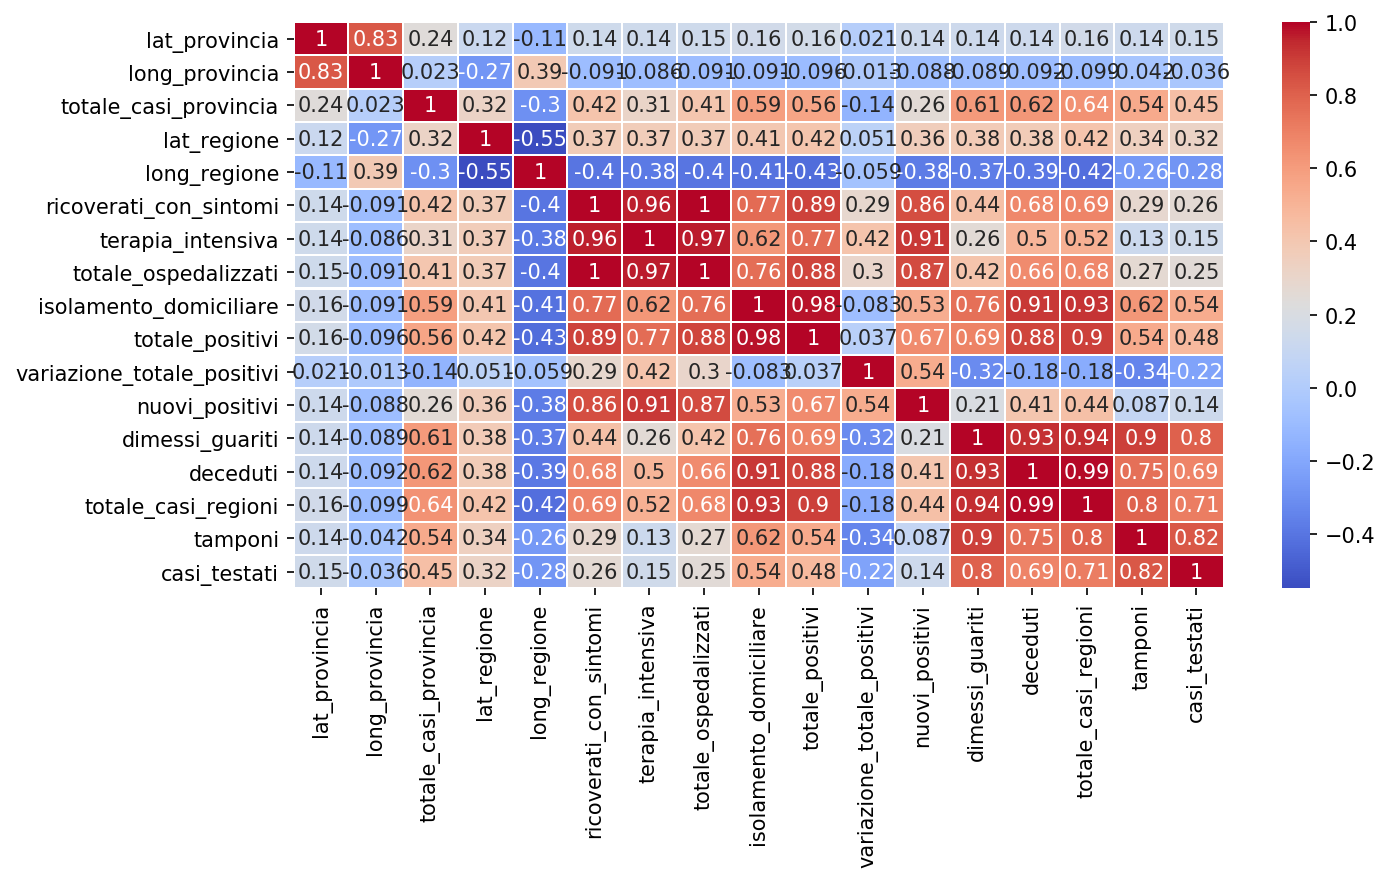

In [11]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(joinDF.corr(), annot=True, linewidths= 0.5 , cmap = 'coolwarm')

Ci sono ovviamente diverse variabili correlate. Ad esempio il totale degli ospedalizzati è dato dalla somma tra i ricoverati con sintomi e quelli in terapia intensiva.

> *Quali sono state le regioni con più malati?*

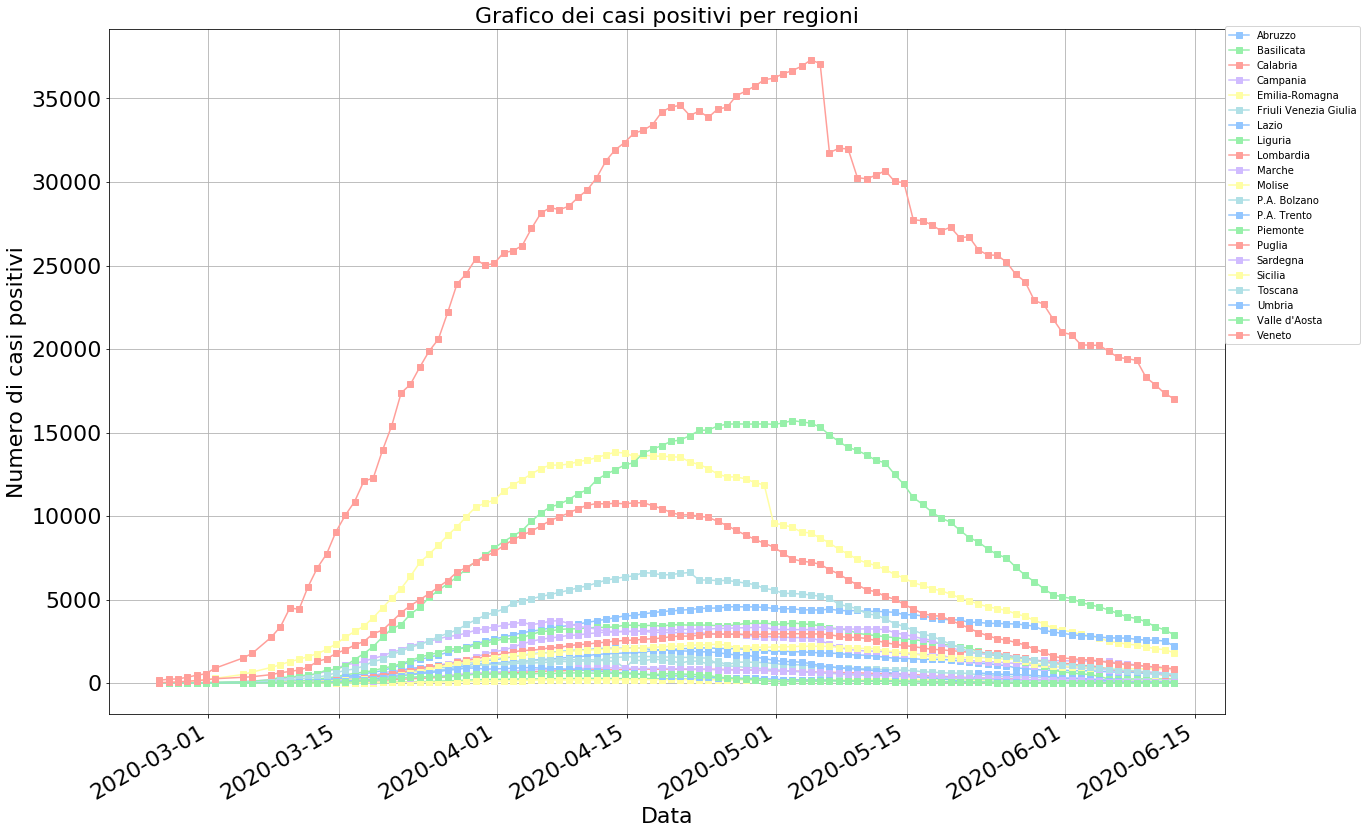

In [12]:
casiPositviPerRegioni = joinDF.pivot_table('totale_positivi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
casiPositviPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei casi positivi per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di casi positivi', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

Da questo grafico che raffigura l'andamento del numero di casi positivi nel periodo d'interesse si può esservare che le regioni con più contagi sono nell'ordine: Lombardia, Piemente ed Emilia Romagna e Veneto. Si osservi anche che dal 16 aprile il Piemonte supera l'Emilia Romagna in numero di contagi.

In [13]:
full_latest = df_regioni[df_regioni['data'] == max(df_regioni['data'])].reset_index()
fig = px.treemap(full_latest.sort_values(by='totale_positivi', ascending=False).reset_index(drop=True), 
                 path=["denominazione_regione"], values="totale_positivi", height=700,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

> *Quanti tamponi sono stati fatti e chi ne ha fatti di più?*

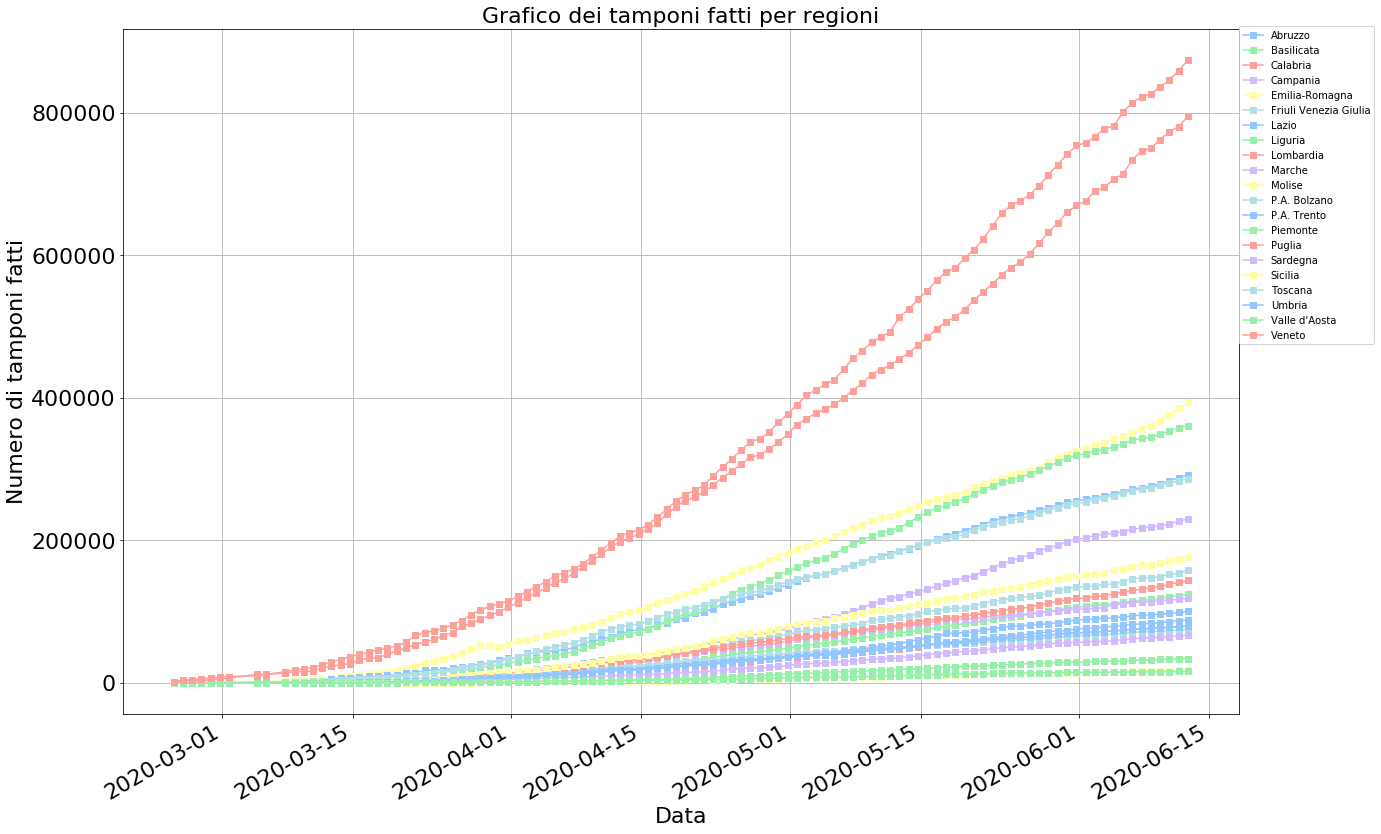

In [14]:
tamponiPerRegioni = joinDF.pivot_table('tamponi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
tamponiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei tamponi fatti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di tamponi fatti', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

Questo grafico evidenzia il numero di tamponi giornalieri effettuti nelle diverse regioni. Si può osservare che la lombardia e il veneto sono le regioni che hanno eseguito più tamponi.

>*Quanto ha speso ogni regione per fare i tamponi per il covid?*

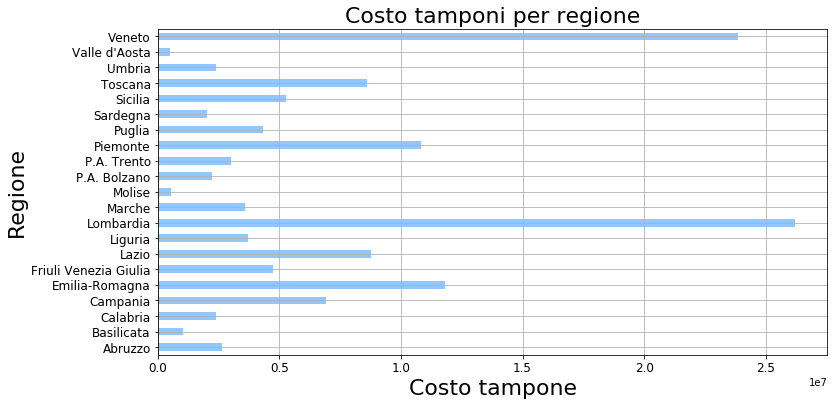

In [15]:
numero_tamponi_regione=np.max(tamponiPerRegioni)
costo_tamponi_regione=numero_tamponi_regione*30
costo_tamponi_regione.plot(kind="barh", figsize=(12,6))
plt.title("Costo tamponi per regione", size=22)
plt.ylabel("Regione", size=22)
plt.xlabel("Costo tampone", size=22)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid()

Abbiamo letto che il costo medio di un tampone per una regione è di 30 euro. Tenendo conto di questo fatto, come si può osservare dal grafico sopra riportato, le regioni che hanno speso di più sono la Lombardia e il Veneto ed ovviamente coincidono con le regioni che hanno eseguito più tamponi.

>*Quanto ha speso lo stato per fare i tamponi per il covid?*

In [16]:
np.sum(costo_tamponi_regione)

135433230

Sommando tutti i costi abbiamo ottenuto il costo totale dei tamponi per lo Stato Italiano: 135.433.230 €

> *Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?*

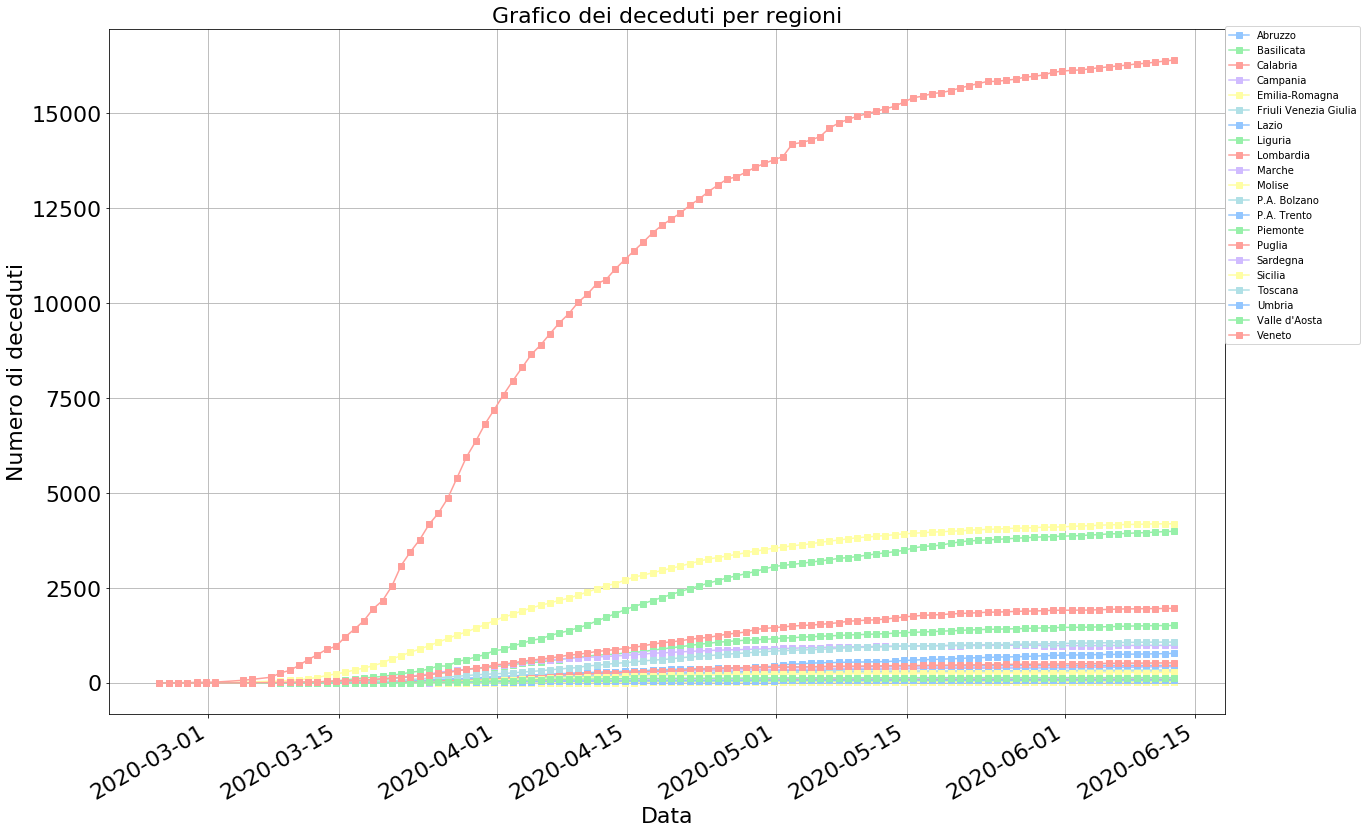

In [17]:
decedutiPerRegioni = joinDF.pivot_table('deceduti', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
decedutiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei deceduti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di deceduti', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

Il grafico precedente l'andamento del numero totale delle vittime nel periodo di riferimento. Come si può osservare, utilizzando anche il grafico sottostante, le regioni più colpite sono Lombardia ed Emilia Romagna.

In [18]:
lastDayDead =decedutiPerRegioni.loc[np.max(decedutiPerRegioni.index)]
lastDayDead = lastDayDead.to_frame('morti')
figLastDead = px.treemap(lastDayDead.sort_values(by = 'morti', ascending = False).reset_index(),
                        path = ["denominazione_regione"], values= 'morti',
                        color_discrete_sequence = px.colors.qualitative.Prism,
                        title="Chart deceduti per regione")
figLastDead.show()

Il grafico precedente mostra il numero totale di persone decedute regione per regione al 13/06/2020.

>*Quali sono state le regioni con più ricoverati?*

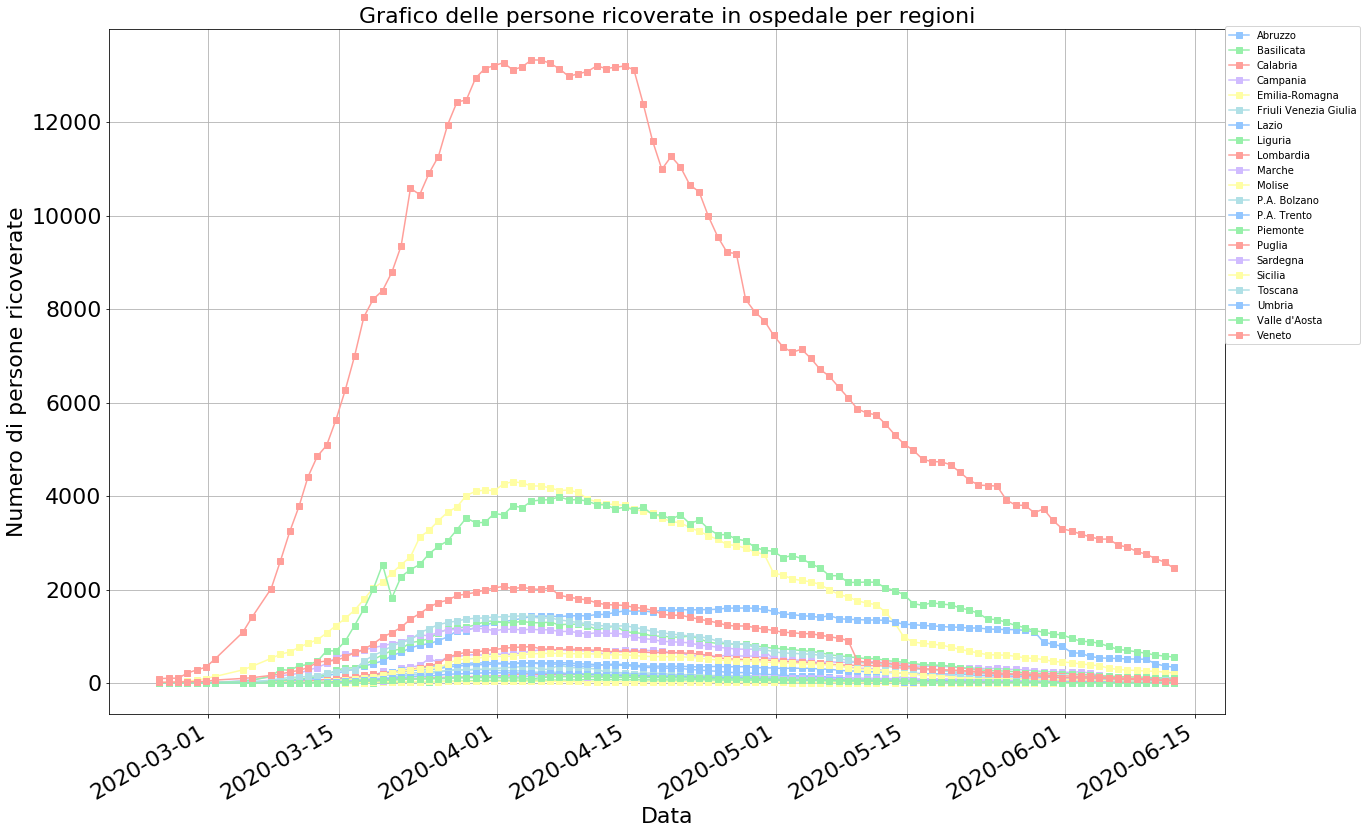

In [19]:
ospedalizzatiPerRegioni = joinDF.pivot_table(values = 'totale_ospedalizzati', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
ospedalizzatiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

In questo grafico mostriamo l'affluenza negli ospedali delle regioni nel periodo di riferimento. Si noti che dal 15 aprile si verifica il numero di persone ricoverate negli ospedali del Piemonte supera quello dell'Emilia Romagna questo risultato è coerente con l'incremento del numero di tamponi effettuati dalle due regioni. 

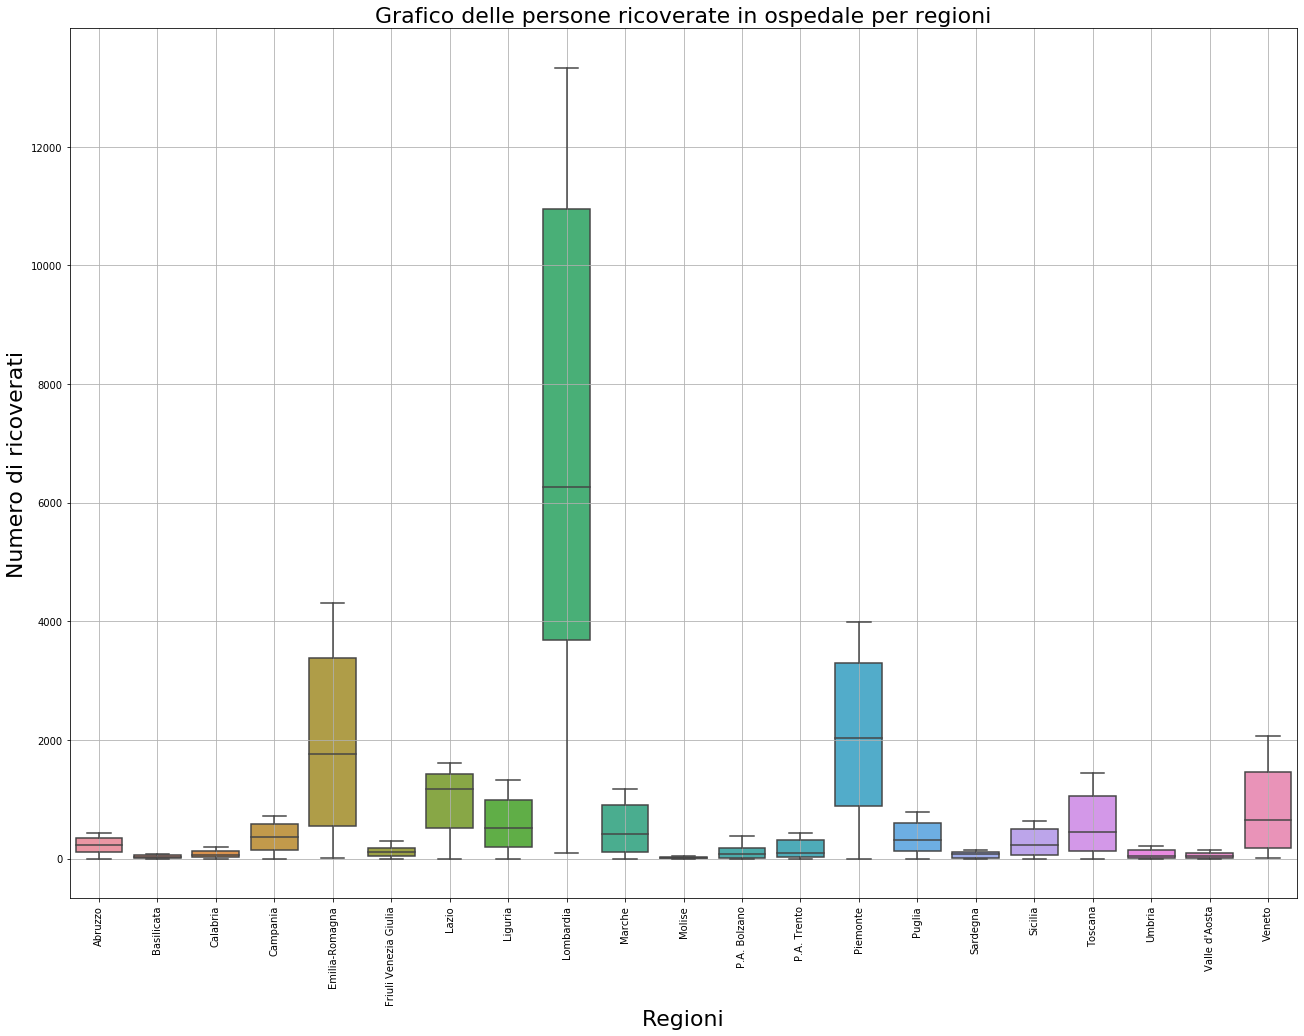

In [20]:
#ospedalizzatiPerRegioni.boxplot(figsize=(20,14), fontsize=22)
plt.figure(figsize = (22,16))
sns.boxplot(data= ospedalizzatiPerRegioni)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Regioni',size = 22)
plt.xticks(rotation=90)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.grid()

Nel grafico sopra riportato si raffigura l'intervallo entro cui varia il numero di ricoverati regione per regione. Possiamo suddividere le regioni in quattro classi:
- le regioni che hanno avuto un numero molto elevato di ricoverati, Lombardia;
- le regioni che hanno avuto un numero elevato di ricoverati, Emilia Romagna e Piemonte;
- le regioni che hanno avuto un numero importante di ricoverati, Lazio, Liguria, Marche, Toscana e Veneto;
- le regioni che hanno avuto un numero basso o bassissimo di ricoverati, Abruzzo, Basilicata, Campania, ecc.

>*Quanto è costata alla regione curare un malato covid in terapia intensiva?*

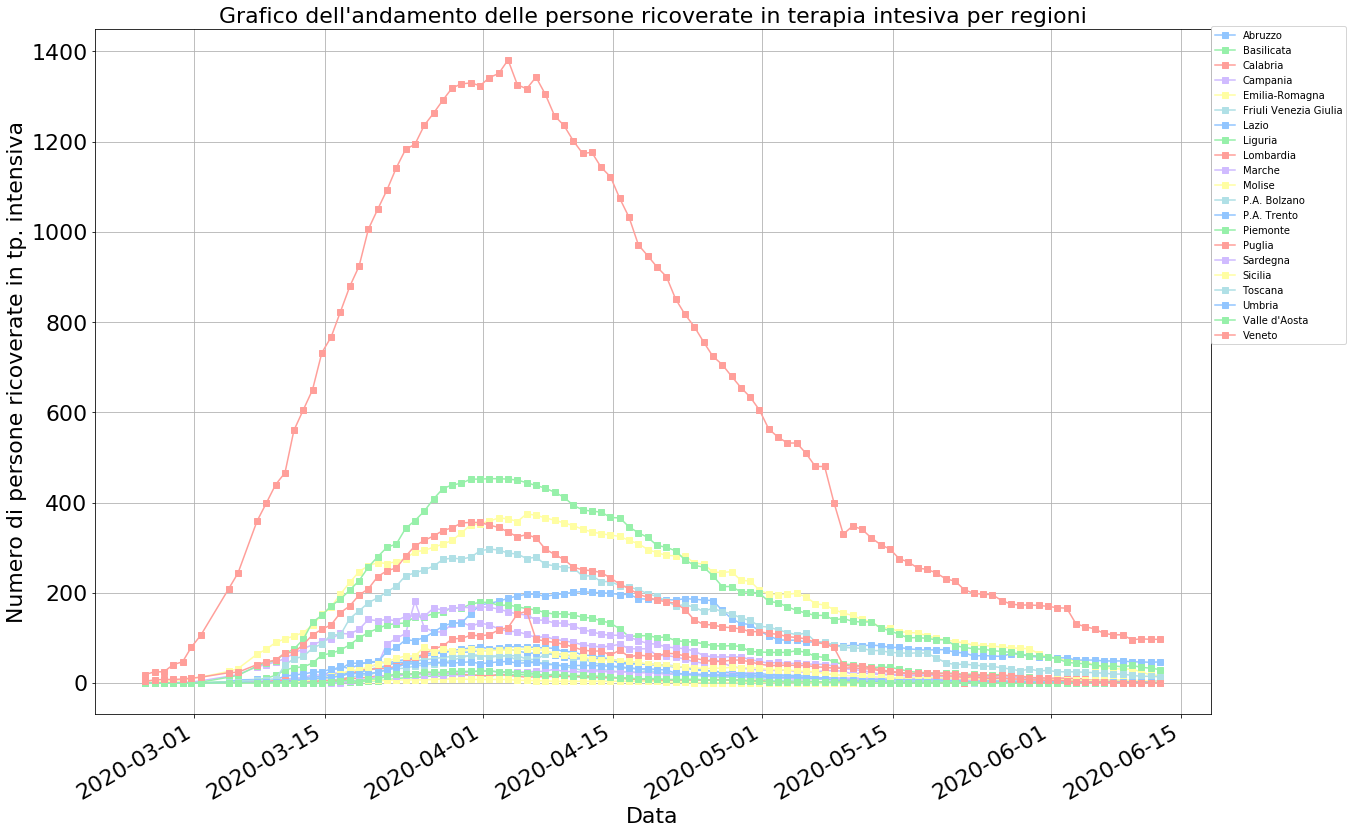

In [21]:
terapiaIntsPerRegioni = joinDF.pivot_table(values = 'terapia_intensiva', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
terapiaIntsPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesiva per regioni", size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

Sopra viene riportato il grafico dell'andamento del numero di ricoverati in terapia intensiva regione per regione nel periodo di riferimento. Si ripete anche qui il trend già osservato in precedenza. Il totale delle persone ospèedalizzate è infatti strettamente correlato con il numero di persone in terapia intensiva.

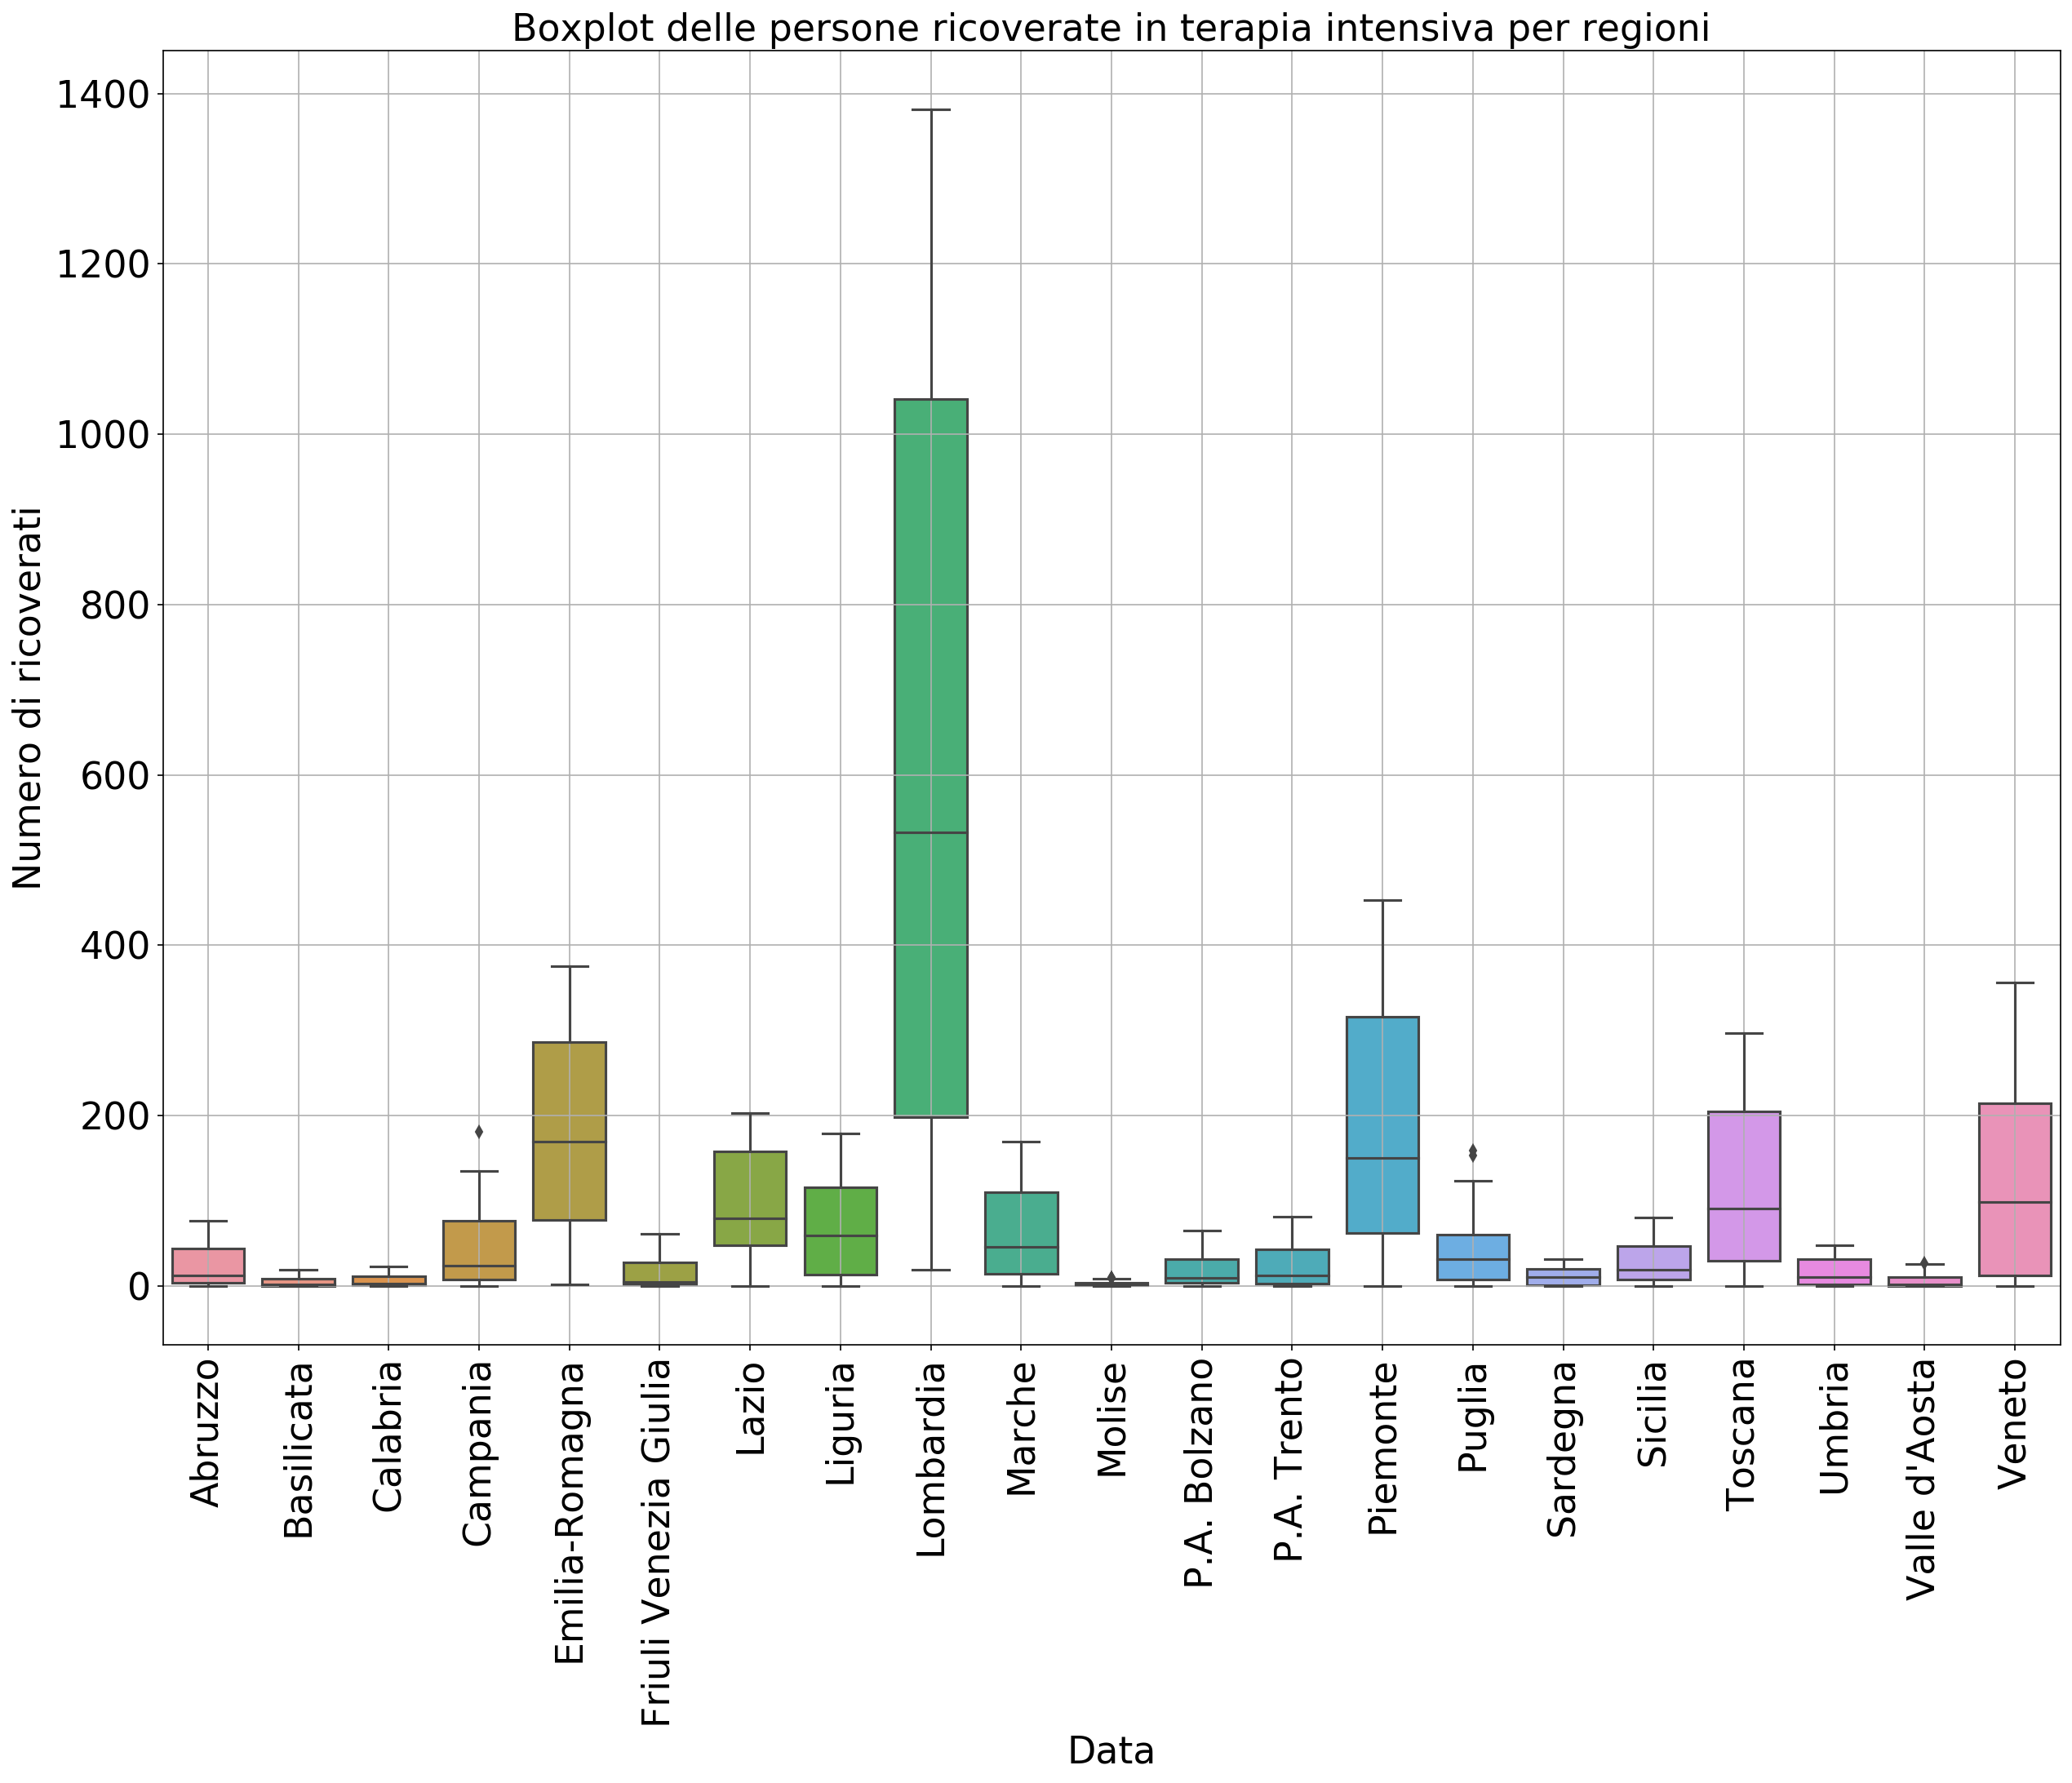

In [22]:
plt.figure(figsize=(20,14), dpi = 150)
plt.title('Boxplot delle persone ricoverate in terapia intensiva per regioni', size = 22)
sns.boxplot(data = terapiaIntsPerRegioni)
plt.xlabel('Data',size = 22)
plt.xticks(rotation=90, size = 22)
plt.yticks(size = 22)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.grid()

Il Boxplot sopra riportato conferma quanto detto precedentemente.

> *Quanto è costata alla regione curare un malato covid in terapia intensiva?*

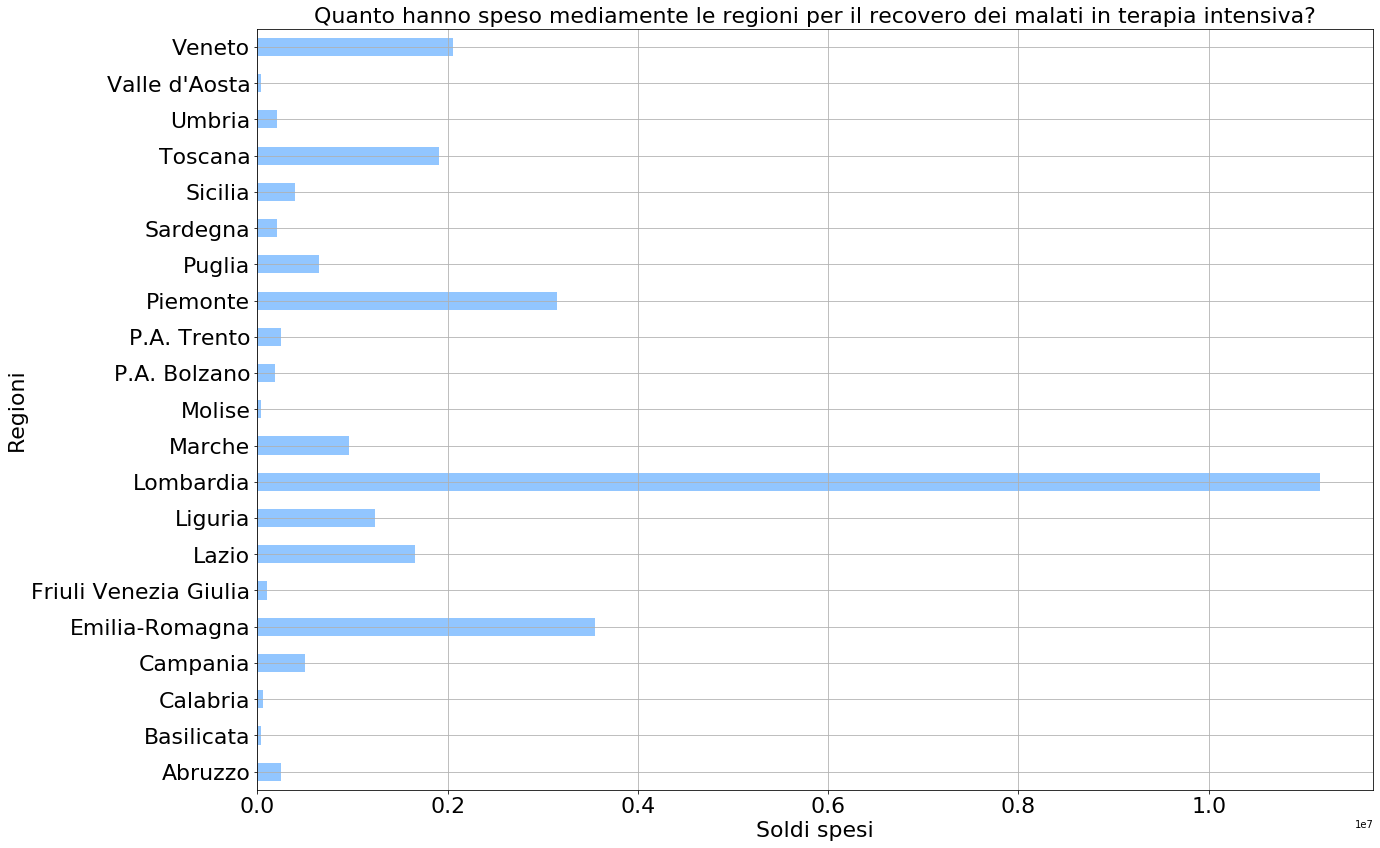

In [23]:
costi_medi_terapia_intensiva=terapiaIntsPerRegioni.median()*1500*14
costi_medi_terapia_intensiva.plot(kind='barh', figsize=(20,14))
plt.title('Quanto hanno speso mediamente le regioni per il recovero dei malati in terapia intensiva?', size = 22)
plt.xlabel('Soldi spesi',size = 22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.ylabel('Regioni', size = 22 )
plt.grid()

Abbiamo letto che alla regione un malato in terapia intensiva costa in media 1500 euro. Tenendo conto di questo fatto, come si può osservare dal grafico sopra riportato, le regioni che hanno speso di più sono la Lombardia, il Piemonte e  il Veneto

>*Quanto è costato mediamente allo stato curare un malato covid in terapia intensiva?*

In [24]:
np.sum(costi_medi_terapia_intensiva)

28665000.0

Sommando tutti i costi spesi dalle regioni per i malati in terapia intensiva si ottiene quanto lo Stato Italiano ha speso per l'assistenza sanitaria a questi ultimi: 28.665.000 €

>*Come si è diffuso nel tempo il Covid-19 in Italia?*

In [25]:
casiPositviPerRegioni =joinDF.pivot_table(index=['data','denominazione_regione'],
                                          aggfunc={'lat_regione':np.max,'long_regione':np.max, 'totale_positivi':np.max, 'deceduti':np.max})
casiPositviPerRegioniCopy = casiPositviPerRegioni.copy()
casiPositviPerRegioniCopy['dim'] = casiPositviPerRegioniCopy['totale_positivi'].pow(0.5)
casiPositviPerRegioniCopy.reset_index(inplace = True)
casiPositviPerRegioniCopy['data']=casiPositviPerRegioniCopy['data'].dt.strftime('%m/%d/%Y')
fig = px.scatter_mapbox(casiPositviPerRegioniCopy, lat="lat_regione", lon="long_regione",
                        color="totale_positivi",size='dim',
                        hover_name='denominazione_regione', hover_data=['totale_positivi'],
                        range_color= [0, max(casiPositviPerRegioniCopy['totale_positivi'])+2],
                        animation_frame="data", 
                        title='Diffusione del covid nel tempo')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=4, mapbox_center = {"lat": 41.8719, "lon": 12.5674})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

Sopra abbiamo inserito un'animazione che mostra l'evoluzione del numero di contagi nel tempo.

## Data prediction con il modello SIR
<img src="https://lacittanews.it/wp-content/uploads/2020/04/702635-thumb-full-720-160420merkel.jpg" 
        alt="UniFI logo" style="float: center; width: 40%; height: 36%;">
        



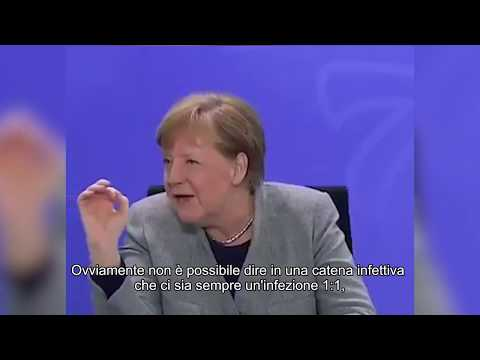

In [26]:
YouTubeVideo('aBO9gvgiuVA')

Il modello SIR è un modello che consente di fare previsioni sull'evoluzione di una malattia infettiva nel tempo. Il modello è definito dai seguenti parametri:
- $S$, indica il numero di *individui sensibili*. Quando un individuo sensibile e un individuo contagioso entrano in contatto, l'individuo sensibile contrae la malattia e passa al compartimento infettivo;
- $I$, indica il numero di *individui infetti*. Questi sono gli individui che sono stati infettati e sono in grado di infettare gli individui sensibili;
- $R$, indica il numero di *individui immuni* o *deceduti*. Questi sono gli individui che sono stati infettati e si sono ripresi dalla malattia oppure sono deceduti.
- $n$, indica il numero di abitanti nella regione considerata.
- $\beta$ e $\gamma$ indicano rispettivamente il *tasso di contagio* e il *tasso medio di ricoveri*. Secondo lo schema:

<p><a href="https://commons.wikimedia.org/wiki/File:SIR_Flow_Diagram.svg#/media/File:SIR_Flow_Diagram.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/SIR_Flow_Diagram.svg/1200px-SIR_Flow_Diagram.svg.png" alt="SIR compartment model" style="float: center; width: 50%;"></a></p>


In [27]:
def SIR(y, t, n, beta, gamma):
    S, I, R = y
    dSdt = -(beta*S*I)/n
    dRdt = gamma*I
    dIdt = -dSdt -dRdt
    return dSdt, dIdt, dRdt

In [28]:
from scipy.integrate import odeint

# Total population, N.
N = 10e6 #numero di abitanti in lombardia
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 176, 0 #si comincia con un infetto e zero guariti/morti
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # ci ricaviamo il numero di persone sane
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) #tempo in numero di giorni

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Abbiamo applicato il modello SIR al caso della Lombardia e della Toscana con una timeline di 90 giorni.

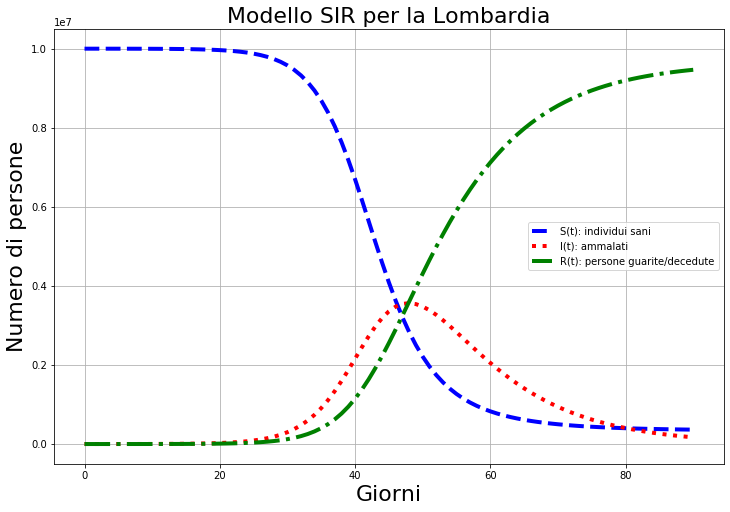

In [29]:
plt.figure(figsize=(12,8))
plt.plot(S, lw = 4, color = 'blue', linestyle ='--', label='S(t): individui sani')
plt.plot(I, lw = 4, color = 'red',linestyle =':', label='I(t): ammalati')
plt.plot(R, lw = 4, color = 'green',linestyle = '-.', label='R(t): persone guarite/decedute')
plt.title('Modello SIR per la Lombardia', size = 22)
plt.xlabel('Giorni', size = 22)
plt.ylabel('Numero di persone', size = 22)
plt.legend()
plt.grid()

Adattando il modello alla regione Lombardia si ottiene che il picco della malattia si ha in un periodo di tempo che si colloca tra i 40 e i 60 giorni dall'inizio della pandemia. 

In [30]:
# Total population, N.
N = 3700000 #numero di abitanti in lombardia
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0 #si comincia con un infetto e zero guariti/morti
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # ci ricaviamo il numero di persone sane
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) #tempo in numero di giorni

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

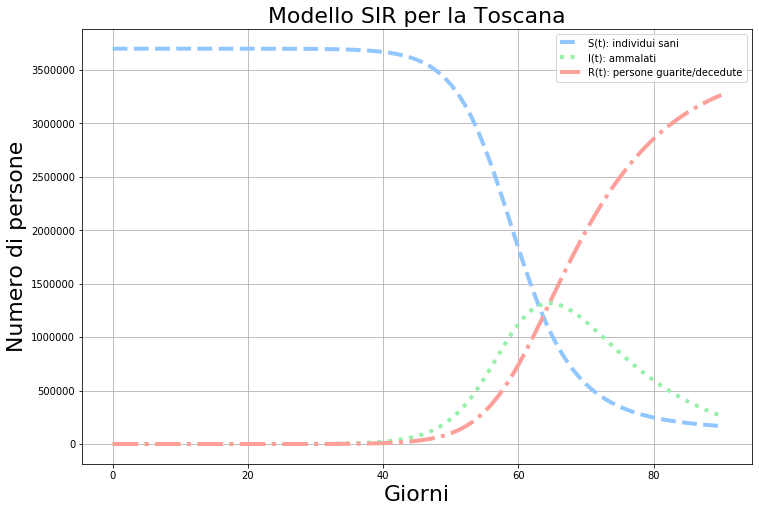

In [31]:
plt.figure(figsize=(12,8))
plt.plot(S, lw = 4, linestyle ='--', label='S(t): individui sani')
plt.plot(I, lw = 4, linestyle =':', label='I(t): ammalati')
plt.plot(R, lw = 4, linestyle = '-.', label='R(t): persone guarite/decedute')
plt.title('Modello SIR per la Toscana', size = 22)
plt.xlabel('Giorni', size = 22)
plt.ylabel('Numero di persone', size = 22)
plt.legend()
plt.grid()

Adattando il modello alla regione Toscana si ottiene che il picco della malattia si ha in un periodo di tempo che si colloca tra i 60 e gli 80 giorni dall'inizio della pandemia.